In [118]:
import matplotlib.pyplot as plt
import csv
from collections import defaultdict
data = []

with open('Survey.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        data.append(lines)

In [83]:
qdict = defaultdict(list)

In [84]:
questions = data[0]

In [85]:
for answers in data[1:]:
    for idx, ans in enumerate(answers):
        qdict[questions[idx]].append(ans)

In [86]:
qdict

defaultdict(list,
            {'Enter your full name?': ['Shruti Magai',
              'Anonymous Gear',
              'Aditya Madan',
              'Arnab Datta',
              'Pratik Devnani',
              'Naman',
              'Divyansh Singhal',
              'Prashant Ghosh',
              'Aditya Singh ',
              'Parth Nagpal',
              'Aishwarya Basliyal ',
              'Amrit Brar',
              'random',
              'Smridh ',
              'Lakshit Madaan',
              'Dhruv Mongia',
              'Vinod',
              'Sidhant',
              'Parul Shah',
              'Bhavikshah Atulkumar',
              'Sumanth Damani',
              'Rajeev Singhal',
              'Priyanka Katariya',
              'Ankit Jain',
              'Ujjwal Jain',
              'Vishal Mehta',
              'Tanvi Shah',
              'Nirant Gol',
              'Shashank Krishna',
              'Reema Shah',
              'Pushpa Pattani',
              'Darpan Jain',

In [87]:
for question in questions:
    print("\'{}\':,".format(question))

'Enter your full name?':,
'What is your age group?':,
'Which option closest resembles your profession?':,
'Which mobile operating system do you use?':,
'Do you use a VPN?':,
'When apps ask for location permission, which option do you usually select? (1)':,
'When apps ask for location permission, which option do you usually select?':,
'Does the U.S government have the ability to track the movement of cellphones?':,
'Which of the following is(are) within the capabilities of the US police?':,
'Burglars can track valuable items by extracting location data from their pictures':,
'Ad campaigns can use location data for intimidation?':,
'Mobile Apps are known to sell your location data to government/contractors?':,
'How accurately can apps track your location?':,
'Apps sell your location data to be able to provide free services?':,
'During the ‘Black Lives Matter’ protests, location data was used to monitor who was there and on what side of the line they stood to conclude their political opin

In [92]:
# answer dict
q_a =  {
'Does the U.S government have the ability to track the movement of cellphones?':'It can track the movement of cell phones without any warrant',
'Which of the following is(are) within the capabilities of the US police?': 'Track GPS Location on your phone',
'Burglars can track valuable items by extracting location data from their pictures': 'TRUE',
'Ad campaigns can use location data for intimidation?': 'TRUE',
'Mobile Apps are known to sell your location data to government/contractors?': 'TRUE',
'How accurately can apps track your location?': 'Precise locations and amount of time spent at each location.',
'Apps sell your location data to be able to provide free services?': 'TRUE',
'During the ‘Black Lives Matter’ protests, location data was used to monitor who was there and on what side of the line they stood to conclude their political opinion?': 'TRUE',
'Even when location data is anonymised, it can still be linked to you using public information with very high accuracy?': 'TRUE',
}

In [90]:
name_answer = defaultdict(list)
names = qdict['Enter your full name?']


for ques, answers in qdict.items():
    for idx, answer in enumerate(answers):
        name_answer[names[idx]].append(answer)

In [91]:
name_answer

defaultdict(list,
            {'Shruti Magai': ['Shruti Magai',
              '18 - 27',
              'STEM / Engineering',
              'Android',
              'No',
              'While using the app',
              'Approximate',
              'It can track the movement of cell phones without any warrant',
              'Track GPS Location on your phone',
              'TRUE',
              'TRUE',
              'TRUE',
              'Precise locations and amount of time spent at each location.',
              'TRUE',
              'TRUE',
              'TRUE'],
             'Anonymous Gear': ['Anonymous Gear',
              '18 - 27',
              'STEM / Engineering',
              'Android',
              'Yes',
              'While using the app',
              'Precise',
              'It can track the movement of cell phones without any warrant',
              'Track GPS Location on your phone',
              'TRUE',
              'TRUE',
              'TRUE',
            

In [102]:
name_score = defaultdict(int)

for idx, question in enumerate(questions):
    if question in q_a:
        for name, ans in name_answer.items():
            if ans[idx] == q_a[question]:
                name_score[name] += 1

In [103]:
name_score

defaultdict(int,
            {'Shruti Magai': 9,
             'Anonymous Gear': 9,
             'Aditya Madan': 5,
             'Arnab Datta': 9,
             'Divyansh Singhal': 6,
             'Aditya Singh ': 7,
             'Parth Nagpal': 7,
             'random': 3,
             'Smridh ': 5,
             'Dhruv Mongia': 5,
             'Parul Shah': 5,
             'Ankit Jain': 7,
             'Ujjwal Jain': 8,
             'Darpan Jain': 8,
             'Naman': 7,
             'Prashant Ghosh': 6,
             'Sumanth Damani': 6,
             'Rajeev Singhal': 3,
             'Priyanka Katariya': 7,
             'Vishal Mehta': 4,
             'Shashank Krishna': 4,
             'Pratik Devnani': 6,
             'Amrit Brar': 6,
             'Sidhant': 4,
             'Bhavikshah Atulkumar': 4,
             'Tanvi Shah': 1,
             'Nirant Gol': 4,
             'Reema Shah': 4,
             'Kishan Pattani': 3,
             'Lakshit Madaan': 5,
             'Vinod': 1,


# iOS v/s Android

In [113]:
os_score = defaultdict(list)

for name, ans in name_answer.items():
    os = ans[3]
    os_score[os].append(name_score[name])

In [115]:
os_average = defaultdict(int)

for k,v in os_score.items():
    os_average[k] = sum(v)/len(v)

In [116]:
os_average

defaultdict(int, {'Android': 5.315789473684211, 'iOS': 5.0, 'Other': 3.5})

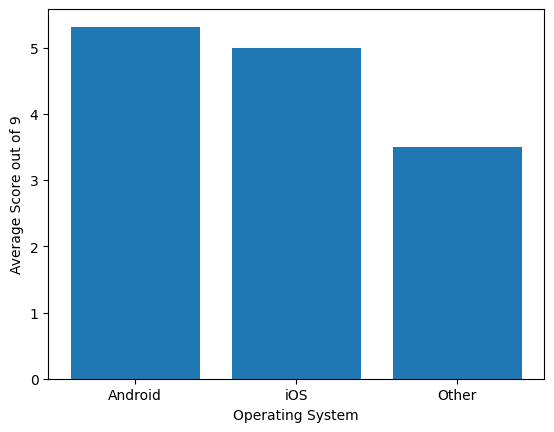

In [122]:
os = list(os_average.keys())
score = list(os_average.values())

plt.bar(range(len(os_average)), score, tick_label=os)
plt.xlabel("Operating System")
plt.ylabel("Average Score out of {}".format(len(q_a)))
plt.show()

# Score by Age

In [125]:
age_score = defaultdict(list)

for name, ans in name_answer.items():
    age = ans[1]
    age_score[age].append(name_score[name])

In [127]:
age_average = defaultdict(int)

for k,v in age_score.items():
    age_average[k] = sum(v)/len(v)

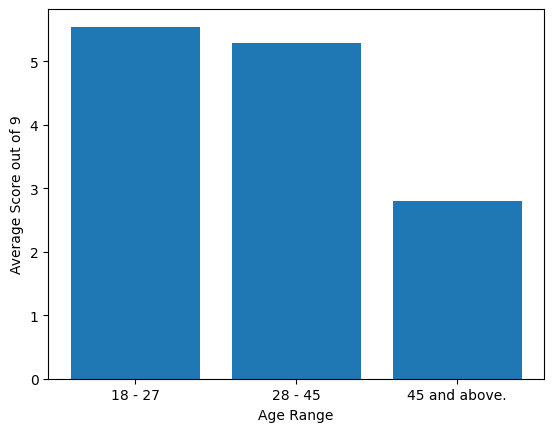

In [130]:
age = list(age_average.keys())
score = list(age_average.values())

plt.bar(range(len(age_average)), score, tick_label=age)
plt.xlabel("Age Range")
plt.ylabel("Average Score out of {}".format(len(q_a)))
plt.show()